# GeoMx-CosMx Data Analysis

In [77]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [78]:
data = sc.read_h5ad("/QRISdata/Q1851/Andrew_C/GeoMx-CosMx/NPC_All_Labelled_Filteredwithbarcodes.h5ad")

In [45]:
data

AnnData object with n_obs × n_vars = 34111 × 1921
    obs: 'Samples', 'Patient', 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Specific_CellType', 'Timepoint', 'Broad_CellType', 'Idents', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Broad_CellType_colors', 'Patient_colors', 'Samples_colors', 'Specific_CellType_colors', 'Timepoint_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


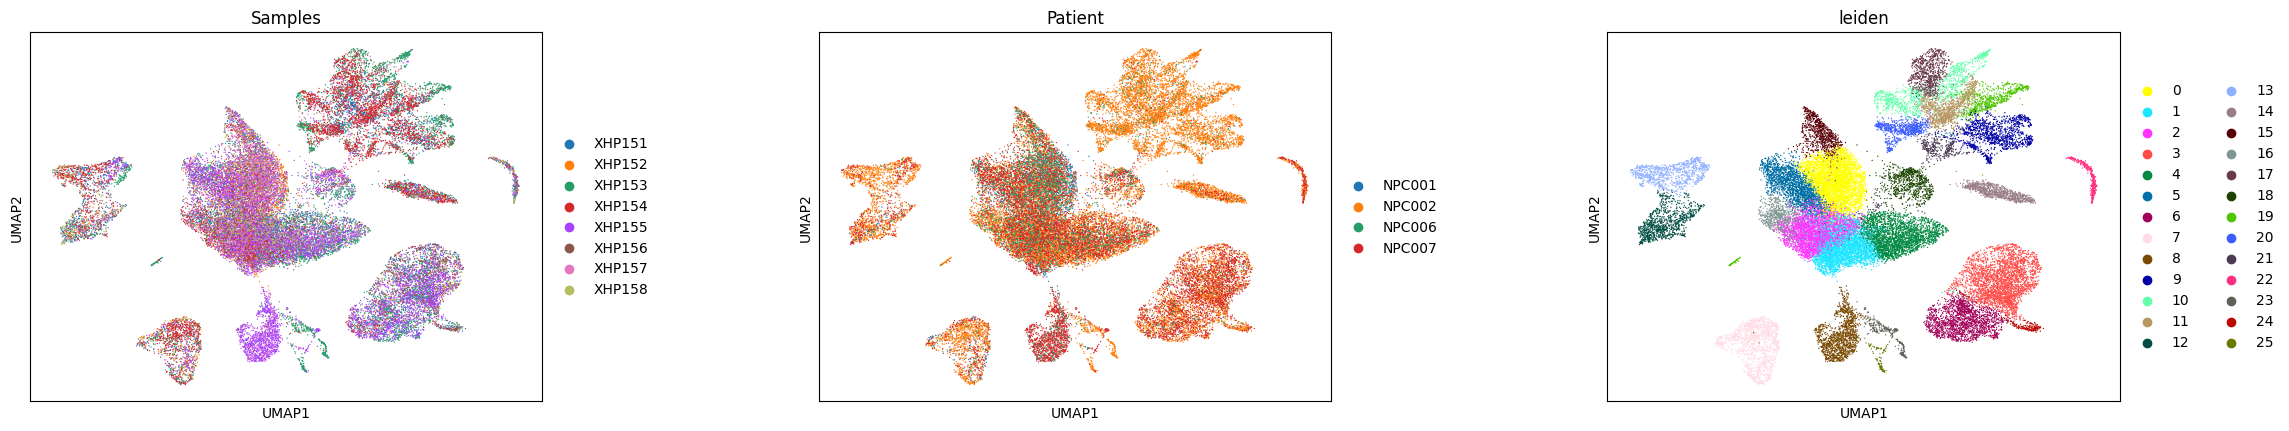

In [4]:
sc.pl.umap(
    data,
    color=[
        "Samples",
        "Patient",
        "leiden",
    ],
    wspace=0.4,
)

In [82]:
def zscore_to_unscaled(z_scores, gene_mean, gene_std_dev):
    return z_scores * gene_std_dev + gene_mean
    

In [83]:
for gene_id in data.var_names:
    gene_mean = data.var.loc[gene_id, 'mean']
    gene_std_dev = data.var.loc[gene_id, 'std']
    z_scores_gene = data[:, gene_id].X  # Extract z-scores for the gene
    unscaled_values_gene = zscore_to_unscaled(z_scores_gene, gene_mean, gene_std_dev)
    data[:, gene_id].X = unscaled_values_gene


In [84]:
adata = anndata.AnnData(data.X)
adata.var_names = data.var_names
adata.obs_names = data.obs_names


In [85]:
df = data.obs
df.to_csv("/QRISdata/Q1851/Andrew_C/GeoMx-CosMx/Data Objects-selected/sc_metadata.csv")

In [86]:
adata.write_h5ad("/QRISdata/Q1851/Andrew_C/GeoMx-CosMx/Data Objects-selected/count_mtx.h5ad")